In [1]:
import keras
import theano
import numpy as np

Using TensorFlow backend.


In [2]:
execfile('00_readingInput.py')

## Import keras to build a DL model 

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.regularizers import l1,l2
from keras.callbacks import EarlyStopping

## Define Network Stucture

In [4]:
print 'Building a model whose loss function is categorical_crossentropy'
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3)

model_adam = Sequential()
model_adam.add(Dense(256, input_dim=200, W_regularizer=l2(0.01)))
model_adam.add(Activation('softplus'))
model_adam.add(Dropout(0.4))
model_adam.add(Dense(512, W_regularizer=l2(0.01)))
model_adam.add(Activation('softplus'))
model_adam.add(Dropout(0.4))
model_adam.add(Dense(512, W_regularizer=l2(0.01)))
model_adam.add(Activation('softplus'))
model_adam.add(Dropout(0.4))
model_adam.add(Dense(5,activation='softmax', W_regularizer=l2(0.01), name='output'))

Building a model whose loss function is categorical_crossentropy


## Show Network Info

In [5]:
model_adam.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 256)           51456       dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 256)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 256)           0           activation_1[0][0]               
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 512)           131584      dropout_1[0][0]                  
___________________________________________________________________________________________

## Set up the optimizer 

https://keras.io/optimizers/

`SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam, TFOptimizer`

- lr: float >= 0. Learning rate.
- momentum: float >= 0. Parameter updates momentum.
- decay: float >= 0. Learning rate decay over each update.
- nesterov: boolean. Whether to apply Nesterov momentum.

In [6]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Nadam, Adamax
#sgd = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)
# Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)
# Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
#sgd =Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)
#sgd =Adagrad(lr=0.01, decay=0.0)
#sgd =Adam(lr=0.01, decay=0.0)
#sgd = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)
# RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


sgd = SGD(lr=0.001,momentum=0.9,decay=0.0,nesterov=False)
adam =Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

## Compile model with specified loss and optimizer



In [7]:
## categorical_crossentropy mean_squared_error
model_adam.compile(loss='categorical_crossentropy',
				optimizer=adam,
				metrics=['accuracy'])

## set the size of mini-batch and number of epochs

In [8]:
batch_size = 16
nb_epoch = 60

## Fit models and use validation_split=0.1

In [9]:
history_adam = model_adam.fit(X_train, Y_train,
							batch_size=batch_size,
							nb_epoch=nb_epoch,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1,
                            callbacks=[early_stopping])

## Get the result in each epoc

In [10]:
'''Access the loss and accuracy in every epoch'''
loss_adam= history_adam.history.get('loss')
acc_adam = history_adam.history.get('acc')

''' Access the performance on validation data '''
val_loss_adam = history_adam.history.get('val_loss')
val_acc_adam = history_adam.history.get('val_acc')

## Visualization

In [11]:
''' Visualize the loss and accuracy of both models'''
import matplotlib.pyplot as plt
plt.figure(4)
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam,label='Training')
plt.plot(range(len(val_loss_adam)), val_loss_adam,label='Validation')
plt.title('Loss')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_adam)), acc_adam,label='Training')
plt.plot(range(len(val_acc_adam)), val_acc_adam,label='Validation')
plt.title('Accuracy')
# plt.show()
plt.savefig('00_firstModel.png',dpi=300,format='png')

print 'Result saved into 00_lossFuncSelection.png'

Result saved into 00_lossFuncSelection.png


In [12]:
from IPython.display import Image, display

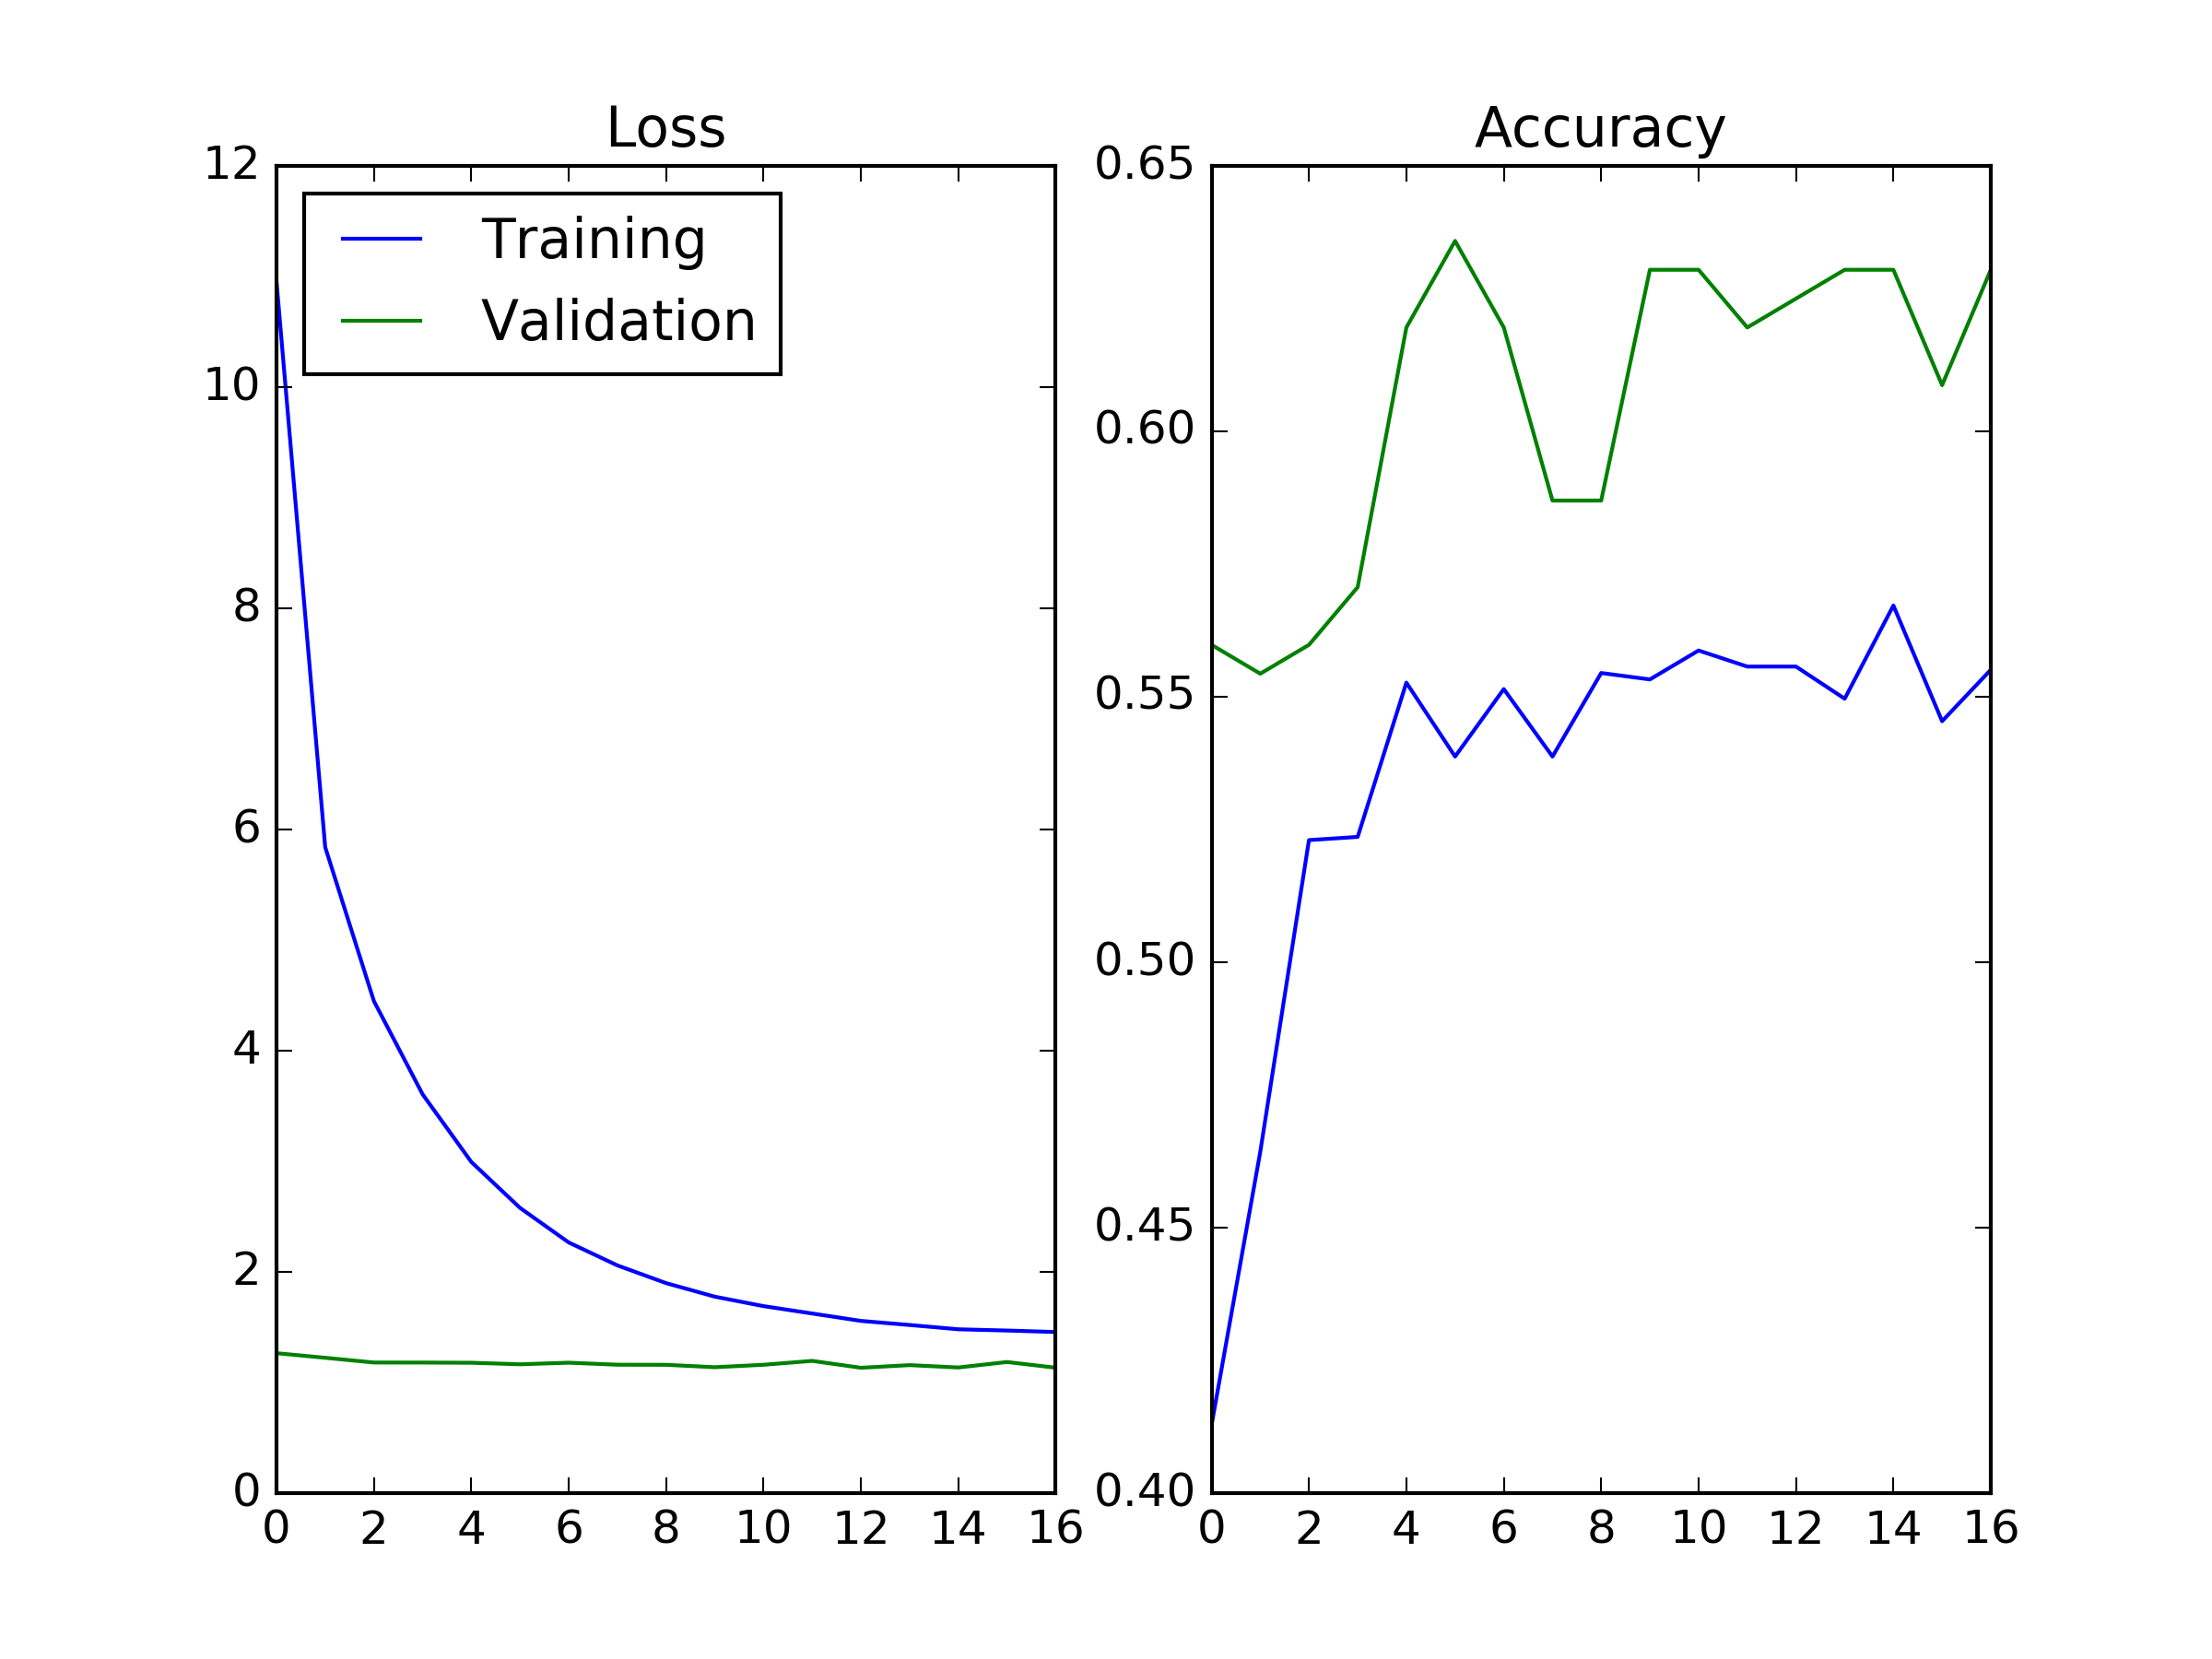

In [13]:
display(Image(filename='00_firstModel.png'))